# Сборный проект №1 — Изучение закономерностей, определяющих успешность игр #

**Описание проекта:**

   Перед нами данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:**

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [2]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, начнем с того, что приведем названия столбцов к нижнему регистру:

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Далее, поработаем с пропусками:

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data.duplicated().sum()

0

Сразу отбросим пропуски в столбцах **year_of_release** и **name**, т.к. их количество очень мало. Их появление, скорее всего, связано с ошибкой во время заполнения либо выгрузки данных.

In [7]:
data = data.dropna(subset = ['year_of_release', 'name'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Поработаем со столбцом **user_score**, узнаем его уникальные значения:

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Посмотрим, что за значения *tbd* в этом столбце и их количество:

In [9]:
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Заменим все значения *tbd* на *NaN*, поскольку эта аббревиатура расшифровывается как **to be determined** - **будет определено**.

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Приведем тип значений столбца **user_score** к float, и еще раз взглянем на таблицу.

In [11]:
data['user_score'] = data['user_score'].replace('NaN', np.nan)
data['user_score'] = data['user_score'].astype(float)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Я предлагаю не заполнять пропуски медианными или средними значениями в столбцах **critic_score**, **user_score** или **rating**, поскольку их количество слишком велико. Даже если мы сгруппируем игры по жанрам и попытаемся выяснить медианное значение в каждой группе - такое заполнение пропусков будет по-прежнему слишком грубым, поэтому будем работать с теми данными, что мы имеем.

Причины пропусков в столбцах рейтинга может быть несколько:
- если это **user_score**, то, скорее всего, игра не набрала достаточного количества оценок от игроков, либо подсчет рейтинга был отложен на будущее (вспоминаем значение **to be determined**);
- если это **critic_score**, то игра просто еще не получила оценку критиков;
- если это **rating**, то, скорее всего, организация ESRB еще не присвоила рейтинг той или иной игре. В теории, такие пропуски должны обладать рейтингом **RP**, но я не стану делать такую замену, поскольку пропусков в в столбце **rating** слишком много, и это может исказить наш анализ в дальнейшем.

Для удобства сравнения столбцов **critic_score** и **user_score** предлагаю умножить все значения столбца **user_score** на 10.

In [12]:
data['user_score'] = data['user_score']*10
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Столбец **year_of_release** приведем к *int*, т.к. это год релиза и он может быть только целочисленным.

In [13]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [14]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных ##

Посмотрим, сколько игр выпускалось в разные годы.

Text(0.5, 1.0, 'Количественное распределение по годам')

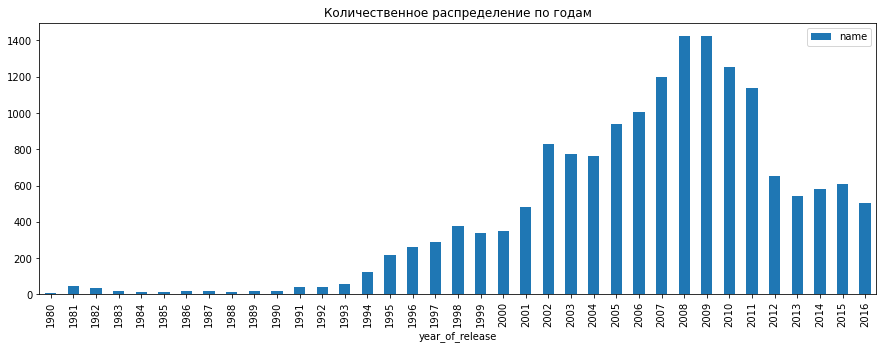

In [18]:
games_count_by_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
#games_count_by_year.sort_values(by='year_of_release', ascending=False)
games_count_by_year.plot(y = 'name', kind = 'bar', figsize = (15,5))
plt.title('Количественное распределение по годам')

Итак, мы видим, что в 90-х годах продажи видеоигр начинают расти большими темпами и пик продаж через наш интернет-магазин приходится на 2008-2009 годы, после 2009 года мы наблюдаем нелинейное падение продаж вплоть до 2016 года (данные за 2016 год могут быть неполными). Это можно объснить тем, что в начале 90-х появляется большое количество различных платформ, видеоигры набирают огромную популярность, а после 2008 года количество платформ начинает сокращаться, а у производителей видеоигр меняется подход к выпуску игр: многие видеоигры разрабатываются годами (чуть ли не десятилетиями), их бюджеты составляют миллионы долларов. Можно сказать, что производители видеоигр стали "брать" скорее качеством игр, а не их количеством.

Посмотрим, по каким платформам больше всего суммарных продаж.

[Text(0.5, 1.0, 'Суммарные продажи по платформам')]

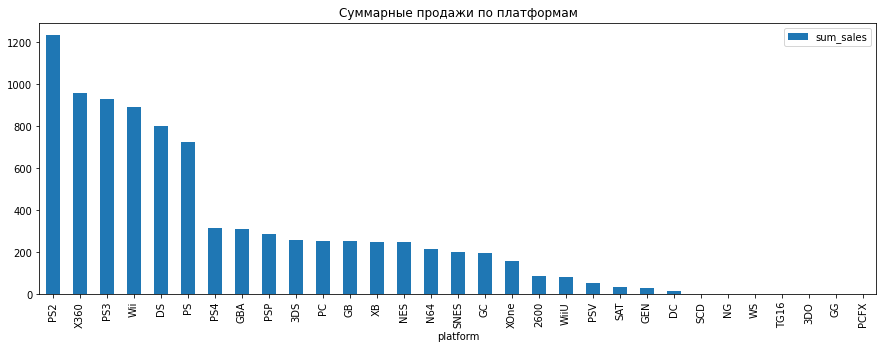

In [16]:
platform_sum_sales = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
platform_sum_sales.sort_values(by='sum_sales', ascending=False).plot(y = 'sum_sales', kind = 'bar', figsize = (15,5)).set(title='Суммарные продажи по платформам')

Итак, выделим топ-6 платформ с самыми большими суммарными продажами, это: **PS2, X360, PS3, Wii, DS** и **PS**. Построим для них распределения суммарных продаж по годам.

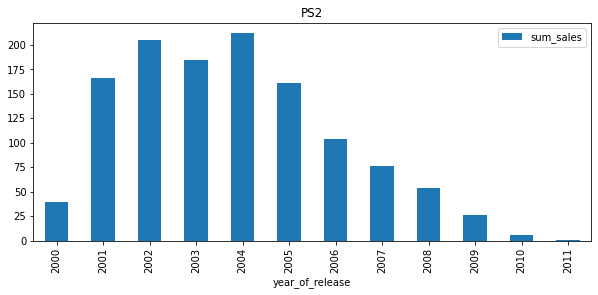

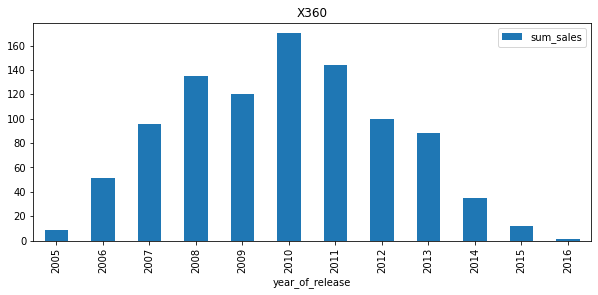

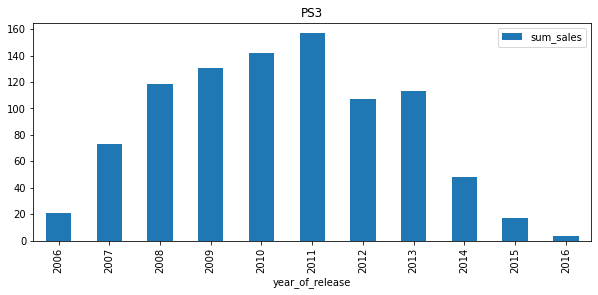

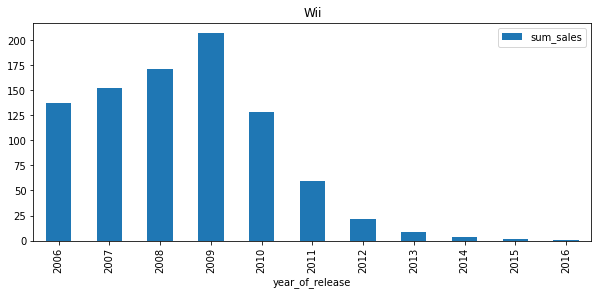

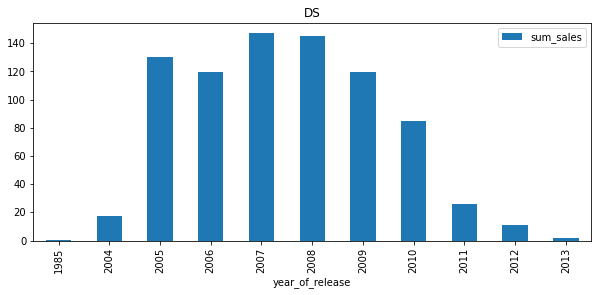

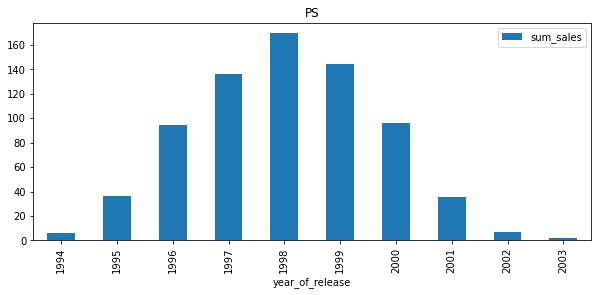

In [17]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(
        index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
        kind='bar', figsize=(10,4))
    plt.title(platform)

По графикам выше можем сделать интересные выводы:
- Все графики продаж напоминают нам нормальное распределение (со смещением в ту или иную сторону, или вовсе без смещения).
- Абсолютно по всем платформам мы наблюдаем спад продаж к 2015-2016 годам, а то и вовсе их отсутствие, как например, у платформ **PS**, **DS** и **PS2**, у которых пики продаж приходятся на 1998, 2008 и 2004 года соответственно. Такое падение связано с устареванием платформ и выпуска более новых версий приставок: на замену **PS** пришел **PS2**, на замену **PS2** пришел **PS3**, на замену **DS** появился **3DS**.
- Для платформ **X360** и **PS3** мы видим пики продаж в 2009-2011 годах, а затем их спад к 2016 году, это также связано с выпуском новых приставок: на смену **X360** пришел **XOne**, а на смену **PS3** пришел **PS4**. У производителей игровых приставок и производителей видеоигр есть явная договоренность выпускать новые игры только на новых консолях, таким образом, заставляя пользователей старых консолей покупать их новые улучшенные версии.
- На счет приставки **Wii**: падение связано скорее всего с тем, что она является прямым конкурентом **X360** и **PS3**, с выпуском новых **XOne** и **PS4** приставка **Wii** также начала устаревать.

Теперь, построим точечную диаграмму по каждой платформе по годам. 

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

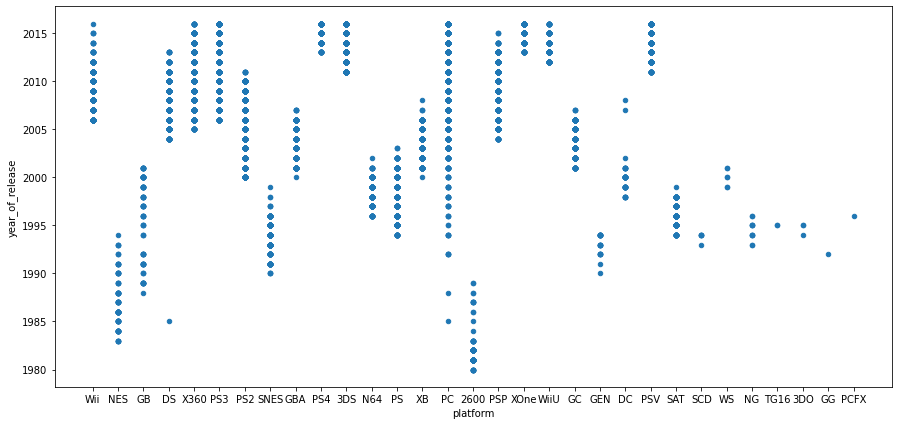

In [18]:
data.plot(x='platform', y='year_of_release', kind='scatter', figsize = (15,7))

Итак, мы снова видим, что игры для многих платформ покупались только в определенный временной промежуток и на данный момент могут быть не актуальны. Например, мы можем наблюдать большие продажи для платформ **PS2** и **DS**, но, как мы видим дальше на столбчатой диаграмме, для них игры перестали покупать уже после 2013 года. Причины я уже называл выше - это выпуск новых консолей.

На этот раз выделим только новые платформы, по которым у нас есть продажи в 2012-2016 годах, это: **PS4, 3DS, PC, XOne, WiiU, PSV**, также добавим к ним **PSP**, продажи по которому шли вплоть до 2015 года. Также построим для них распределения суммарных продаж по годам.

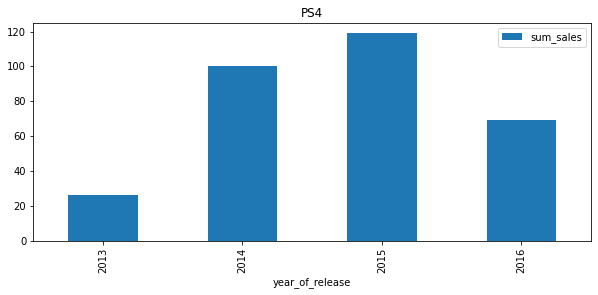

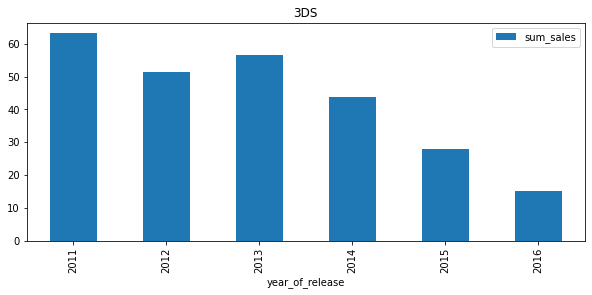

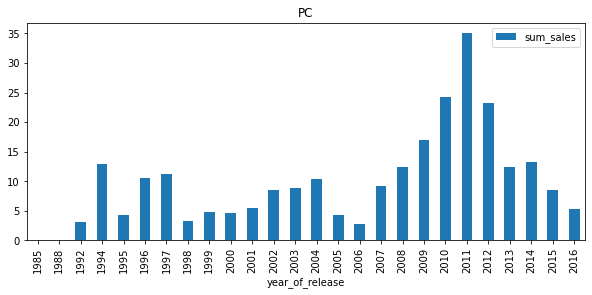

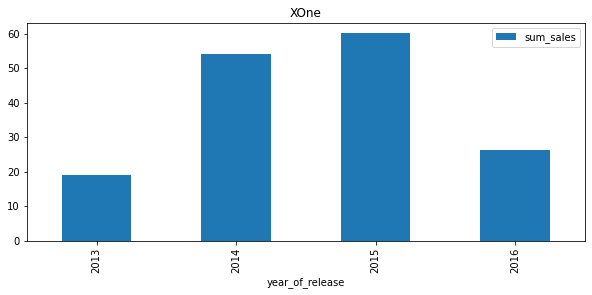

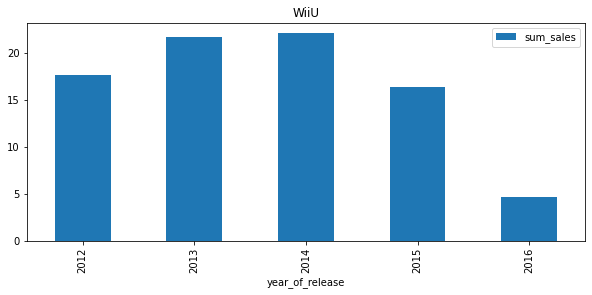

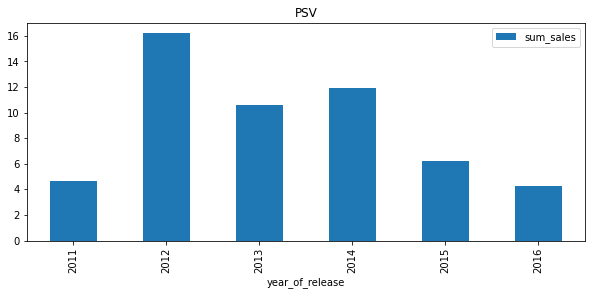

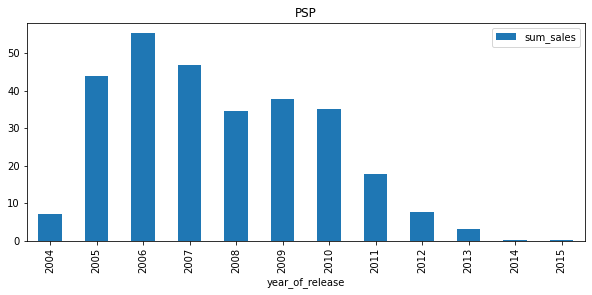

In [19]:
new_platforms = ['PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSV', 'PSP']

for platform in new_platforms:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
        kind='bar', figsize=(10,4))
    plt.title(platform)

Итак, графики получились довольно разные, попробуем выделить некоторые закономерности *за последние 5 лет*:
- Для новых приставок **PS4** и **XOne** мы видим большой всплеск продаж к 2014-2015 годам: можем предположить, что эти платформы будут лидировать в ближайшие 2-3 года и их продажи, скорее всего, будут расти (не забываем, что спад в 2016 году связан с тем, что данные за 2016 год неполные). При чем, наш лидер за 2015 год и фаворит большинства геймеров -  это **PS4**: 120 миллионов копий, за ним идет **XOne**: 60 миллионов копий.
- Продажи на **3DS** и **PSV** нелинейно падают: это связано с устареванием этих консолей, и, скорее всего, в ближайшие несколько лет продажи по ним могут еще сильнее упасть. Мы можем связать это с тем, что эпоху ручных консолей сменяют смартфоны, очень часто игры на смартфонах обладают великолепной графикой, сюжетом и т.д., а то и вовсе бывают портированы с приставок или **PC** (взять, например, портированную на смартфоны *GTA San Andreas* от *Rockstar*, или же *Heroes of Might and Magic 3* от *Ubisoft* - это лучшее, что могло произойти с игровой индустрией смартфонов).
- игры для **PC** - вечная классика. Мы видим всплески и падения в разные года, связано это все с теми же приставками: когда появляются новые мощные приставки, мы можем наблюдать и падение продаж игр для PC. Видим игромный всплеск в 2011 году: было продано почти 35 миллинов копий, затем линейное падение к 2015 году продано только 10 миллионов копий. Однако, стоит учесть, что универсальность персональных компьютеров гораздо выше, чем у остальных приставок, поэтому можем предположить, что игры на PC будут пользоваться спросом во все времена.
- приставка **WiiU** опять же является ручной консолью, мы видим некий успех продаж игр для этой платформы в 2013-2014 годах (особенно если сравнивать с **PSV**), однако, в 2015 мы видим небольшой спад продаж. Возможно, что в ближайшие 2-3 года продажи для **WiiU** еще будут довольно высокими, но, скорее всего, они будут падать (не забываем про конкуренцию со смартфонами).
- для **PSP** мы опять наблюдаем резкий спад к 2015 году, и это снова связано с тем, что платформа устарела: на замену ей пришла приставка **PSV**.

**Вывод:**

Итак, выделим следующие перспективные платформы, это: **PC, PS4** и **XOne**, из ручных консолей добавим к ним **WiiU, 3DS** и **PSV**, а также не будем списывать со счетов **PS3** и **X360**. Актуальным периодом для нас являются последние 5 лет: 2012-2016 года, именно в эти года появились новые и наиболее перспективные **PS4** и **XOne**.

Попробуем узнать, за какой срок появляются новые и исчезают старые платформы.

In [20]:
platform_living = data.pivot_table(index = 'platform', values = 'year_of_release', aggfunc= pd.Series.nunique)
platform_living.sort_values(by='year_of_release', ascending=False)

,year_of_release
platform,
PC,26
GB,13
NES,12
X360,12
PSP,12
PS2,12
Wii,11
DS,11
PS3,11


In [21]:
platform_living.mean()

year_of_release    7.677419
dtype: float64

По данным выше можем сделать вывод, что среднее время жизни платформы 7.7 лет. Если посмотреть на наиболее популярные приставки от Sony Plastation, время их жизни в среднем составляет 10-12 лет, пик продаж приходится на 5-ый/6-ой год, и обычно тогда же, либо на следующий год после пика продаж, появляется новая версия платформы (**PS** появилась в **1994** году, **PS2** в 2000, **PS3** в 2006, а **PS4** в 2013). Т.е. новые платформы появляются каждые 6 лет, а пик появления новых платформ приходится на 2005-2006 года.

Сделаем срез данных за последние 5 лет, данные за предыдущие года учитывать не будем, а также оставим только интересующие нас платформы.

In [22]:
actual_list = ['PC', 'PS4', 'XOne', 'WiiU', '3DS', 'PSV', 'PS3', 'X360']

actual_data = data[data['year_of_release']>=2012]
actual_data = actual_data[actual_data['platform'].isin(actual_list)].reset_index(drop=True)
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,48.0,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,26.0,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,72.0,E,9.90


In [23]:
actual_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'],
      dtype=object)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

(-0.1, 6.0)

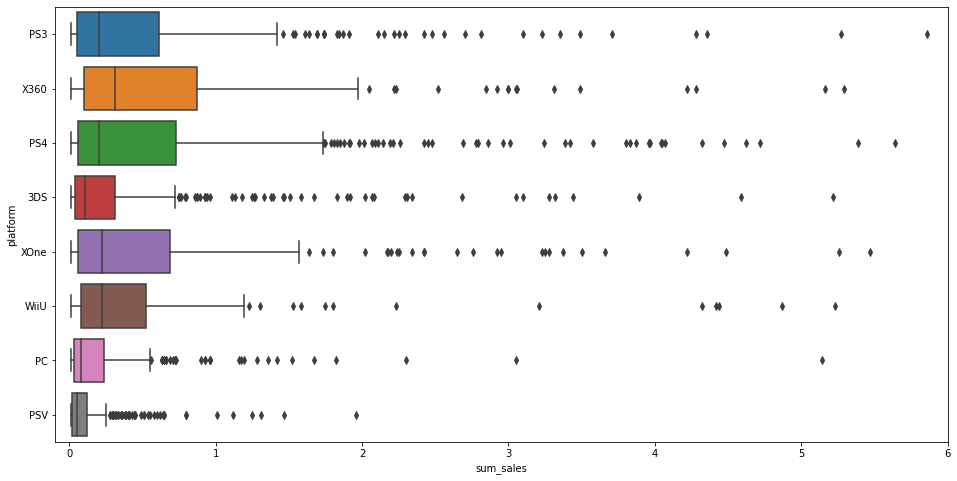

In [24]:
plt.figure(figsize=(16,8))
sns.boxplot(data=actual_data, x='sum_sales', y='platform')
plt.xlim(xmax = 6)
plt.xlim(xmin = -0.1)

(-0.1, 10.0)

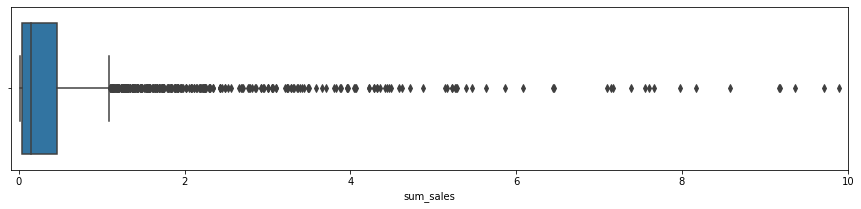

In [25]:
plt.figure(figsize=(15,3))
sns.boxplot(data=actual_data, x='sum_sales')
plt.xlim(xmax = 10)
plt.xlim(xmin = -0.1)

In [26]:
actual_data.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PC,250.0,0.250600,0.494640,0.01,0.03,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.05,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
PSV,411.0,0.119659,0.203011,0.01,0.02,0.05,0.1200,1.96
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
X360,292.0,0.810068,1.712069,0.01,0.10,0.31,0.8700,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


In [27]:
actual_data['sum_sales'].describe()

count    2628.000000
mean        0.527938
std         1.283897
min         0.010000
25%         0.040000
50%         0.140000
75%         0.460000
max        21.050000
Name: sum_sales, dtype: float64

Итак, сделаем выводы по графикам выше:
- Среднее значение продаж у всех платформ разные, но самые высокие средние у **PS4, PS3, XOne** и **X360**. У этих же платформ самое большое количество выбросов и максимальных продаж единичной игры - т.е. игр, которые "выстрелили" в продажах. Несмотря на то, что **PS4** и **XOne** представлены на рынке только недавно, по показателям средних и максимальных продаж (а также выбросов) платформы идет на одном уровне с вышеупомянутыми **PS3** и **X360**.
- Лидерами по количеству различных игр являются **PS3** и **PSV**, с небольшим отставанием идут **PS4** и **PSV**.
- Стоит отметить, что по всем показателям **PC** отходит на второй план по сравнению с приставками.
- у платформы **WiiU** меньше всего игр, однако, они чаще "выстреливают" по сравнению с другими ручными консолями.
- хуже всех дела обстоят у **PSV**, у этой платформы самое маленькое значение средних продаж, меньше всего выбросов и максимальных продаж единичной игры. Можно сказать, что это наименее популярная платформа из нашего итогового списка.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Выберем для этих целей самую перспективную платформу - **PS4**.

In [28]:
actual_data[actual_data['platform'] == 'PS4'][['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sum_sales,0.406568,-0.031957,1.000000


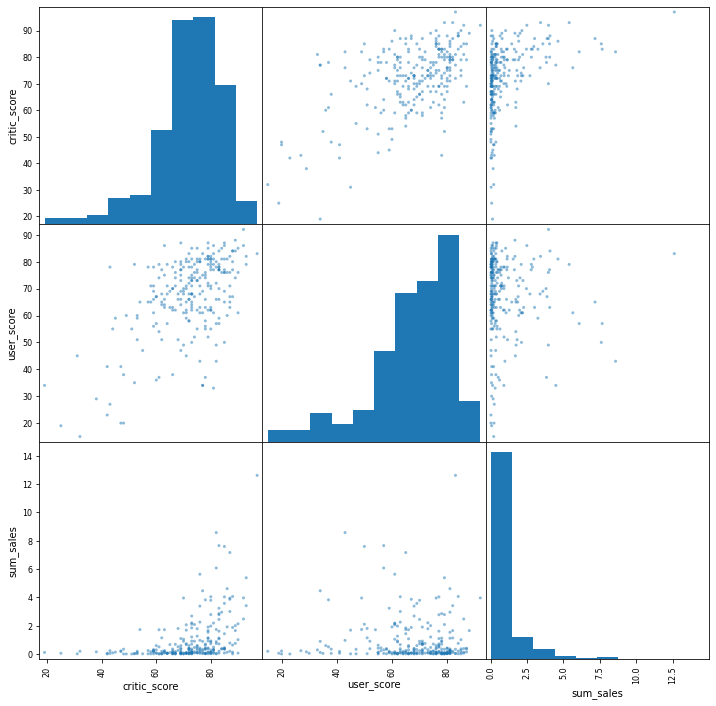

In [29]:
pd.plotting.scatter_matrix(actual_data[actual_data['platform'] == 'PS4'][['critic_score', 'user_score', 'sum_sales']], figsize=(12,12))
plt.show()

**Вывод**: для платформы **PS4** есть умеренная корреляция между оценками критиков и количеством продаж. Т.е. это означает, что игры, у которых высокая оценка критиков, чаще всего, лучше продаются. Корреляция между оценками пользователей и количеством продаж не выявлена.

Сравним наш результат выше с продажами игр на других платформах. Возьмем следующий топ-5: **X360, XOne, PS3, PC** и **3DS**.

Корреляция для платформы X360:
              critic_score  user_score  sum_sales
critic_score      1.000000    0.557352   0.360573
user_score        0.557352    1.000000   0.006164
sum_sales         0.360573    0.006164   1.000000


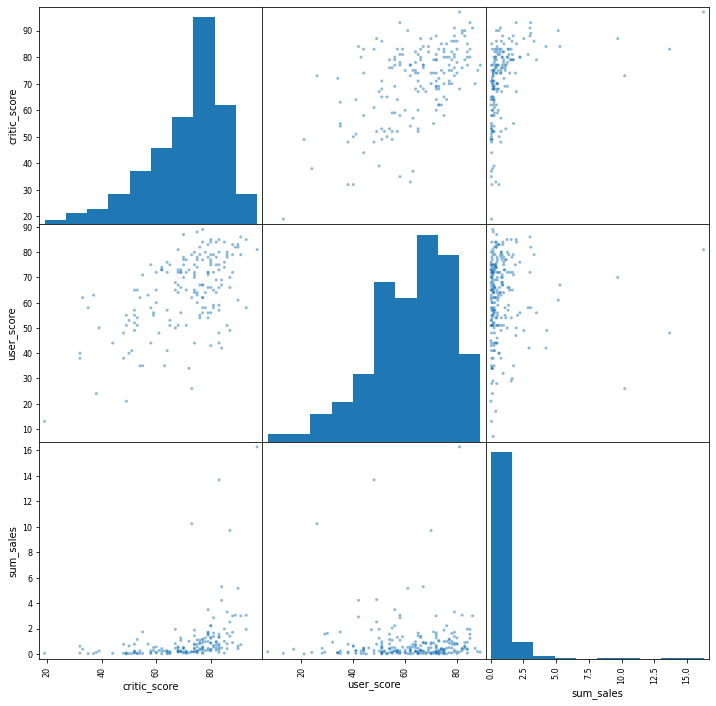

Корреляция для платформы XOne:
              critic_score  user_score  sum_sales
critic_score      1.000000    0.472462   0.416998
user_score        0.472462    1.000000  -0.068925
sum_sales         0.416998   -0.068925   1.000000


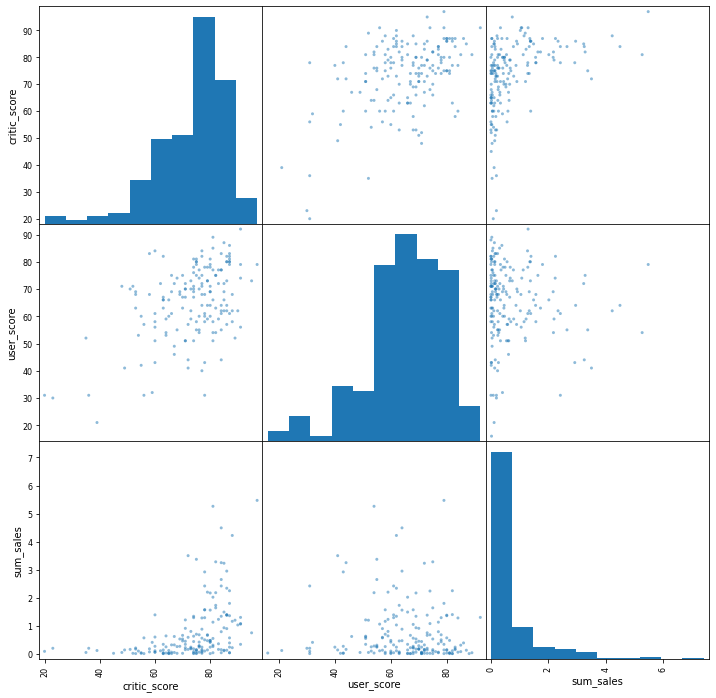

Корреляция для платформы PS3:
              critic_score  user_score  sum_sales
critic_score      1.000000    0.539456   0.331497
user_score        0.539456    1.000000  -0.005144
sum_sales         0.331497   -0.005144   1.000000


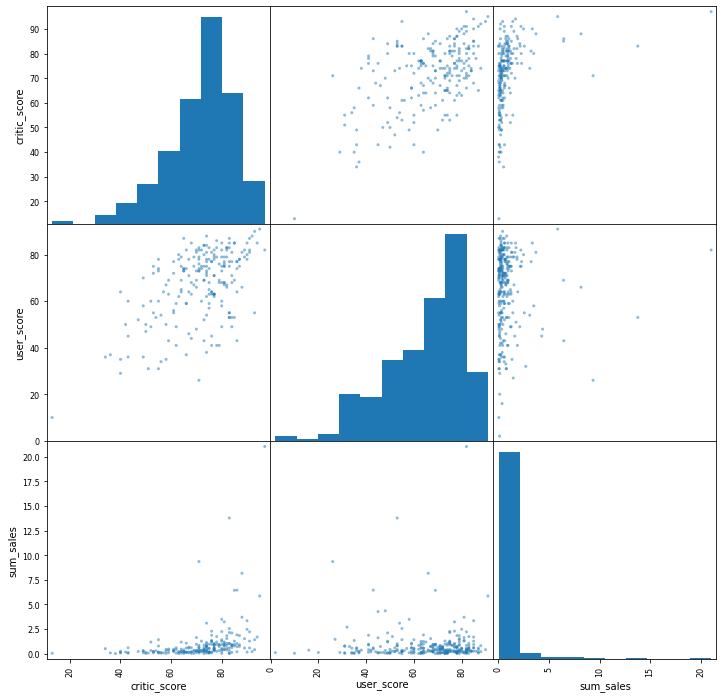

Корреляция для платформы PC:
              critic_score  user_score  sum_sales
critic_score      1.000000    0.432587   0.237243
user_score        0.432587    1.000000  -0.121867
sum_sales         0.237243   -0.121867   1.000000


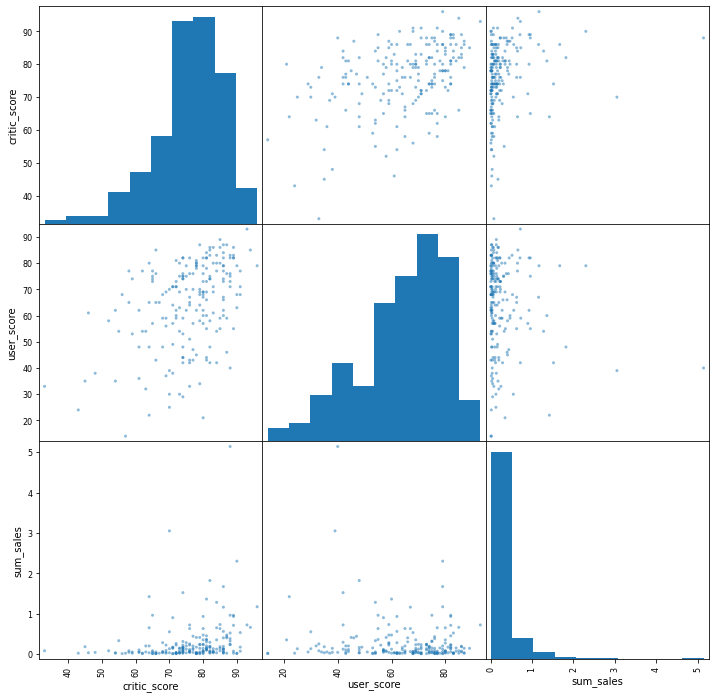

Корреляция для платформы 3DS:
              critic_score  user_score  sum_sales
critic_score      1.000000    0.722762   0.320803
user_score        0.722762    1.000000   0.197583
sum_sales         0.320803    0.197583   1.000000


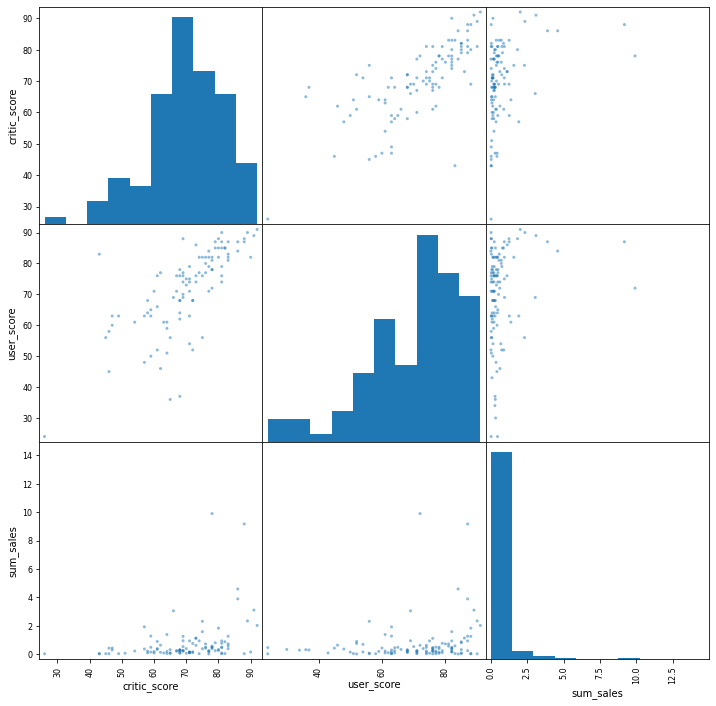

In [30]:
top_5 = ['X360', 'XOne', 'PS3', 'PC', '3DS']
for i in top_5:
    print('Корреляция для платформы', i+':')
    print(actual_data[actual_data['platform'] == i][['critic_score', 'user_score', 'sum_sales']].corr())
    pd.plotting.scatter_matrix(actual_data[actual_data['platform'] == i][['critic_score', 'user_score', 'sum_sales']], figsize=(12,12))
    plt.show()

Итак, сделаем **вывод** по остальным платформам:
- для платформ **X360, XOne, PS3** и **PC** подтверждается наш предыдущий вывод (для **PS4**): есть умеренная корреляция между оценками критиков и количеством продаж. Корреляция между оценками пользователей и количеством продаж не выявлена.
- для ручной консоли **3DS** мы также наблюдаем умеренную корреляцию и для оценок критиков. Корреляция между оценками пользователей и суммарными продажами присутствует, но она очень мала.

Посмотрим на общее распределение игр по жанрам. Попробуем выделить жанры с высокими и низкими продажами.

In [31]:
sales_by_genres = actual_data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc='sum')
sales_by_genres.sort_values('sum_sales', ascending=False)

,sum_sales
genre,
Action,424.79
Shooter,304.73
Role-Playing,179.85
Sports,177.44
Misc,66.29
Platform,58.06
Racing,53.49
Fighting,44.13
Simulation,34.63


In [61]:
actual_data.groupby('genre')['sum_sales'].describe().sort_values('75%', ascending=False)
#actual_data.groupby('genre')['sum_sales'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.44,1.4800,14.63
Sports,249.0,0.712610,1.170033,0.01,0.080,0.26,0.7800,8.58
Platform,81.0,0.716790,1.385690,0.01,0.080,0.21,0.6600,9.90
Role-Playing,337.0,0.533680,1.309494,0.01,0.060,0.16,0.4500,14.60
Action,932.0,0.455783,1.217894,0.01,0.040,0.13,0.4300,21.05
Racing,114.0,0.469211,0.891550,0.01,0.050,0.15,0.4250,7.09
Fighting,105.0,0.420286,0.925179,0.01,0.070,0.15,0.3800,7.55
Misc,165.0,0.401758,0.989286,0.01,0.030,0.13,0.3600,9.18
Simulation,76.0,0.455658,1.274981,0.01,0.030,0.12,0.3525,9.17


(-0.1, 6.0)

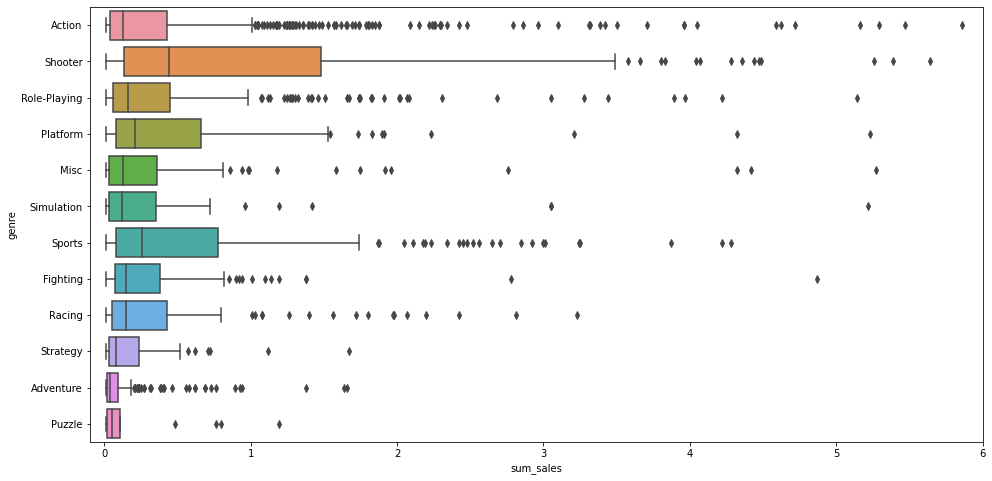

In [55]:
plt.figure(figsize=(16,8))
sns.boxplot(data=actual_data, x='sum_sales', y='genre')
plt.xlim(xmax = 6)
plt.xlim(xmin = -0.1)

**Вывод**: 

- По первой таблице выше мы можем выделить самые популярные жанры по количеству суммарных продаж, это: экшены (**Action**), шутеры (**Shooter**), спортивные игры (**Sports**) и РПГ (**Role-Playing**).

- Однако, если мы проанализируем вторую таблицу, а также "ящик с усами", то по медианным продажам мы выделим уже других лидеров, это: шутеры, платформеры (**Platform**), спортивные игры и РПГ.

- Если же мы посмотрим на количество выбросов, а также на третий квартиль, длину верхнего уса и количество максимальных продаж единичной игры (т.е. игр, которые "выстрелили" в продажах), то мы можем выделить: ***экшены, шутеры, спортивные игры, РПГ*** и ***платформеры***. Популярность данных жанров связана, в первую очередь, с запросами игроков, и как следствие, количеством игр в этих жанрах, и, соответственно, количеством проданных копий.

- Самый непопулярный жанр это пазлы (**Puzzle**), которые, судя по всему, просто устаревают.

## Портрет пользователя каждого региона ##

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5) за последние 5 лет.
- Самые популярные жанры (топ-5) за последние 5 лет.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

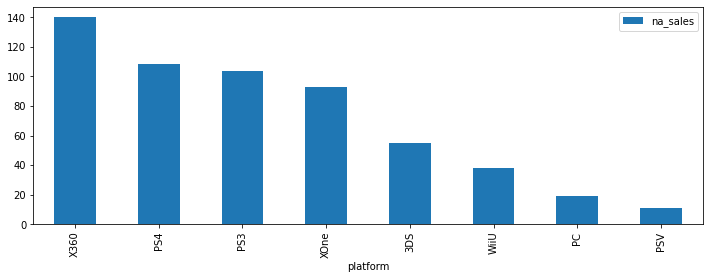

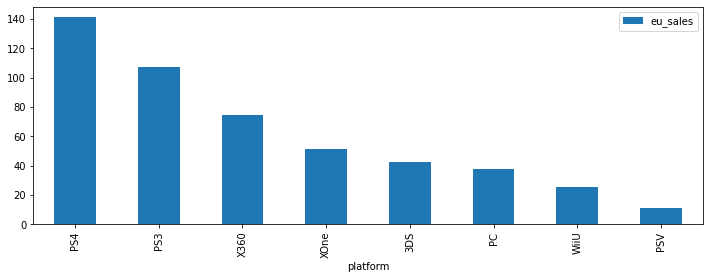

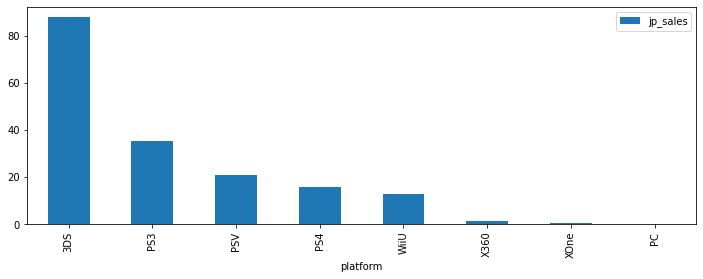

In [45]:
list_of_regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in list_of_regions:
      actual_data.pivot_table(
          index='platform', values=region, aggfunc='sum').sort_values(
          by=region, ascending=False).plot(
          y = region, kind = 'bar', figsize = (12,4))

Рейтинг платформ:
1. Топ-5 платформ для Северной Америки: **X360, PS4, PS3, XOne, 3DS**.
2. Топ-5 платформ для Еропы: **PS4, PS3, X360, XOne, 3DS**.
3. Топ-5 платформ для Японии: **3DS, PS3, PSV, PS4, WiiU**.

Итак, мы видим разные предпочтения игроков в разных регионах: в Америке лидирует **X360**, в Европе **PS4**, а в Японии и вовсе **3DS**. В Японии чувствуется влияние местных производителей платформ (Nintendo и Sony), а также большая любовь к ручным консолям - 3 из 5 самых популярных платформ в Японии это портативные платформы. В Америке также наблюдается влияние местного производителя Microsoft (приставки **X360** и **XOne**), однако, Sony не отстает, и приставки **PS4** и **PS3** занимают 2 и 3 места. В Европе рейтинг очень похож на Амерку, однако, здесь приставки от Sony пользуются наибольшей популярностью. Ручные приставки **3DS** замыкают топ-5 рейтингов Европы и Амерки, в отличие от 1-го места в Японии.

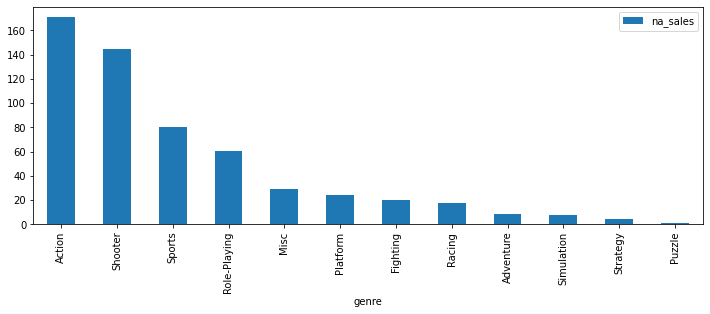

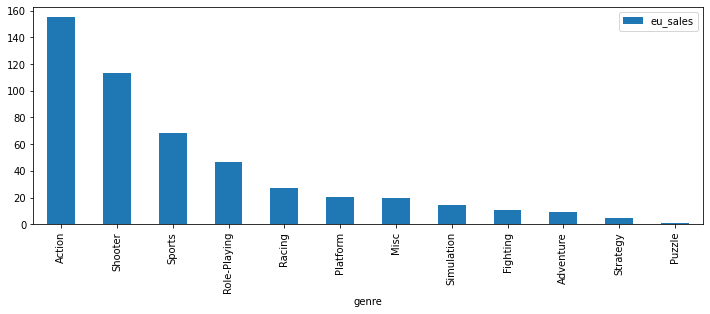

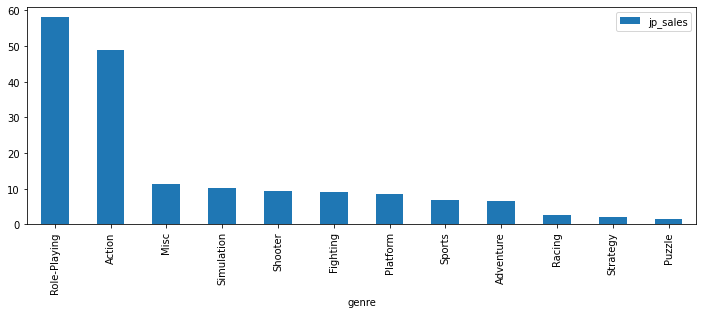

In [46]:
for region in list_of_regions:
      actual_data.pivot_table(
          index='genre', values=region, aggfunc='sum').sort_values(
          by=region, ascending=False).plot(
          y = region, kind = 'bar', figsize = (12,4))

Рейтинг жанров:
1. Топ-5 жанров для Северной Америки: **Action, Shooter, Sports, Role-Playing, Misc**.
2. Топ-5 жанров для Еропы: **Action, Shooter, Sports, Role-Playing, Racing**.
3. Топ-5 жанров для Японии: **Role-Playing, Action, Shooter, Fighting, Sports**.

Как и в случае с платформами, Американские и европейские игроки имеют схожие тенденции по жанрам. Наибольшей популярностью пользуются экшены и шутеры, далее идут спортивные игры и РПГ, различаются только 5-ые места - гонки в Европе, и прочие игры (**Misc**) в Америке. В Японии дела обстоят по-другому - здесь лидируют РПГ, и лишь затем идут экшены и шутеры. Скорее всего, это связано с большой любовью японских игроков к онлайн-РПГ в духе Lineage 2. 4-ое и 5-ое места в Японии занимают файтинги и спортивные игры, соответственно.

Теперь попробуем выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для начала, заполним пропуски в столбце **rating**, введем обозначение **NA**, что будет означать *нет рейтинга*.

In [63]:
actual_data['rating'] = actual_data['rating'].fillna('NA')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NA,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NA,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


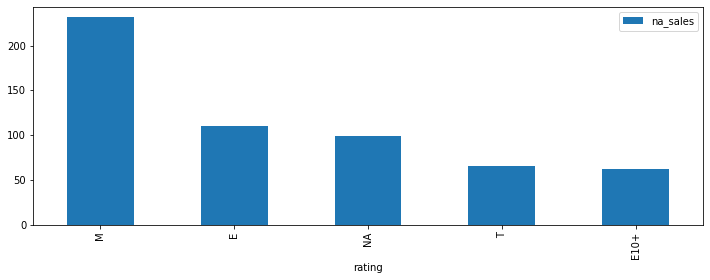

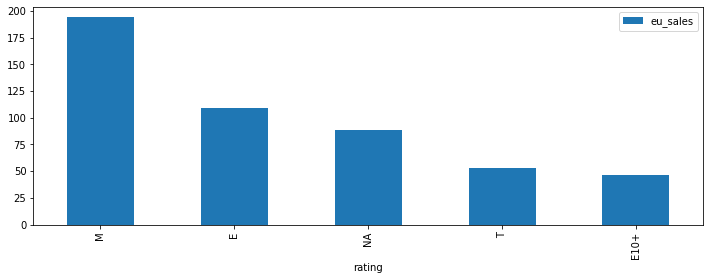

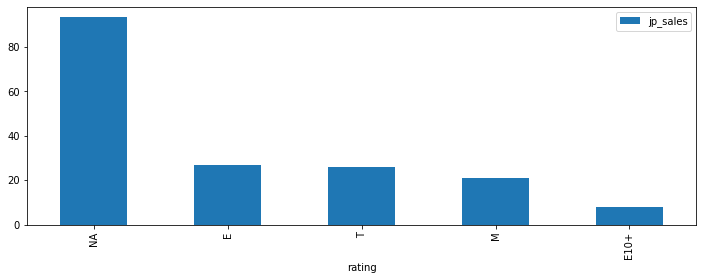

In [64]:
for region in list_of_regions:
      actual_data.pivot_table(
          index='rating', values=region, aggfunc='sum').sort_values(
          by=region, ascending=False).plot(
          y = region, kind = 'bar', figsize = (12,4))

Расшифруем рейтинги:
- **E**: подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
- **E10+**: подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.
- **T**: подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
- **M**: подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных веществ.
- **EC**: для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.
- **RP**: категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
- **NA**: игры, у которых *нет рейтинга*.

Итак, мы видим, что рейтинг возраста влияет по каждому региону:
- Европе и Америке картина снова очень похожа - наибольшей популярностью пользуются игры рейтинга **M** (для лиц старше 17 лет): это как раз могут быть экшены и шутеры, а далее рейтинг **E** (для всех категорий игроков), в категорию которых входят спортивные игры. Это означает, что эти рынки ориентированы на взрослых пользователей. На третьем месте в обоих регионах идут игры без рейтинга **NA**, на 4-ом месте игры **T** (для лиц старше 13 лет).
- В Японии же наибольшей популярностью пользуются игры без рейтинга **NA**, и затем практически наравне идут игры с рейтингами **E** и **T**. Популярность игр без рейтинга **NA** в Японии объясняется тем, в этом регионе пользуются огромной популярностью ручные консоли, игры для которых, судя по всему, не так часто оцениваются организацией **ESRB**. Да и в целом, если мы откроем Википедию, то узнаем, что организация **ESRB** специализируется на играх в США и Канаде. Поэтому, если мы хотим узнать рейтинг японских игр, то нам нужны данные от организации **CERO**.
- Игры с рейтингами **EC** и **RP** не пользуются популярностью ни в одном из регионов.

## Проверка гипотез ##

Проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки первой гипотезы подготовим выборки без пропусков и зададим пороговое значение *alpha*.

- Нулевая гипотиза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [48]:
sample_1 = actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()
sample_2 = actual_data[actual_data['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965135056
Не получилось отвергнуть нулевую гипотезу


У нас получился очень интересный результат - *pvalue* выше *alpha*, поэтому ***нулевую теорию мы отвергать не будем.*** Давайте сравним обе выборки.

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64


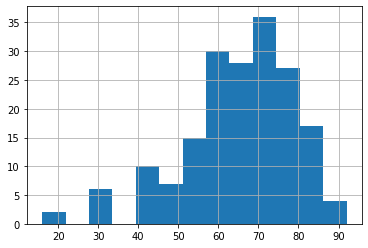

In [49]:
print(sample_1.describe())
sample_1.hist(bins = 13)
plt.show()

count    206.000000
mean      64.286408
std       16.644651
min       14.000000
25%       55.000000
50%       68.000000
75%       77.000000
max       93.000000
Name: user_score, dtype: float64


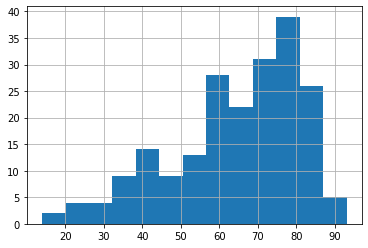

In [50]:
print(sample_2.describe())
sample_2.hist(bins = 13)
plt.show()

Стоит отметить, что пользователи гораздо чаще ставят оценки для игр на **PC**, чем на **XOne** (вторая выборка больше).При ручном сравнении мы также видим, что средние оценки и стандартные отклонения действтельно близки.

**Перейдем ко второй гипотезе.**

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [51]:
sample_3 = actual_data[actual_data['genre'] == 'Action']['user_score'].dropna()
sample_4 = actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.01

results = st.ttest_ind(sample_3, sample_4, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.1059602987445423e-20
Отвергаем нулевую гипотезу


count    513.000000
mean      68.452242
std       13.464731
min       20.000000
25%       63.000000
50%       72.000000
75%       78.000000
max       91.000000
Name: user_score, dtype: float64


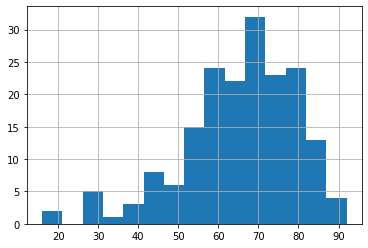

In [52]:
print(sample_3.describe())
sample_1.hist(bins = 15)
plt.show()

count    190.000000
mean      54.584211
std       17.396124
min        2.000000
25%       43.000000
50%       57.500000
75%       68.000000
max       88.000000
Name: user_score, dtype: float64


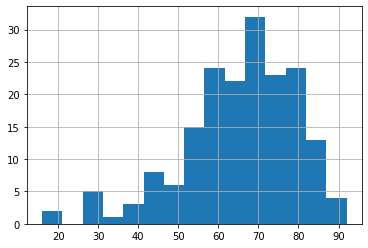

In [53]:
print(sample_4.describe())
sample_1.hist(bins = 15)
plt.show()

*Pvalue* получилось в разы меньше *alpha*, соответственно, мы отвергаем нулевую теорию и соглашаемся с тем, что ***средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.***

## Общий Вывод ##

В ходе проделанной работы:
1. Мы выполнили предобработку данных, а именно:
- Изменили типы данных в некоторых столбцах на более логичные.
- Удалили некоторые незначительные пропуски.
- Обнаружили необычное значение tbd ("to be determined") и заменили это значение на NaN.
- Посчитали общее количество продаж по всем регионам и записали результат в столбец *sum_sales*.

2. Провели анализ данных, а именно:
- Выявили наиболее актуальные платформы, а также актуальный период (2012-2016 года).
- Выявили закономерности и тенденции среди жанров и платформ, которые помогут нам дать прогноз на 2017 год.
- Выявили кореляцию между оценкой критиков и суммарными продажами.

3. Составили портрет пользователей по каждому из регионов: NA, EU и JP, выявили их предпочтения.


4. Проверили две гипотезы и выяснили, что:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


***Итак, cводный анализ для нашего магазина на 2017 год:***
- Стоит сделать ставку на современные платформы: в Европе и Америке будут пользоваться популярностью игры на **PS4** и **XOne**, а в Японии на **3DS** и **PS4**. При этом стоит учитывать, что в 2017 году продажи игр для портативных консолей, скорее всего, снова покажут спад, а вот игры для домашних приставок будут набирать популярность.
- Стоит обращать внимание на игры, которые получают высокую оценку критиков, т.к. у этих игр будут хорошие продажи.
- Стоит выставлять на прилавки популярные жанры - экшен, шутеры, спортивные игры, РПГ и платформеры. Игры в этих жанрах чаще всего "выстреливают" и пользутся наибольшей популярностью среди игроков.
- Стоит не забывать распространять компьютерные игры, т.к. игры на **PC** будут пользоваться популярностью во все времена.